In [1]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf
import matplotlib.pyplot as plt 

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
learning_rate = 0.001
training_epochs = 20
batch_size = 100

In [0]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
#X = tf.placeholder(tf.float32, [None, 28, 28, 1])
X = tf.placeholder(tf.float32, [None, 784]) 
# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])

# Probability of keeping a node during dropout = 1.0 at test time (no dropout) and 0.75 at training time
pkeep = tf.placeholder(tf.float32)

In [0]:
# five layers and their number of neurons (tha last layer has 10 softmax neurons)
L = 100
M = 100
N = 100
O = 100


# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1))  # 784 = 28 * 28
B1 = tf.Variable(tf.zeros([L]))
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.zeros([M]))
W3 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B3 = tf.Variable(tf.zeros([N]))
W4 = tf.Variable(tf.truncated_normal([N, O], stddev=0.1))
B4 = tf.Variable(tf.zeros([O]))
W5 = tf.Variable(tf.truncated_normal([O, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

#The model with dropout 
Y1 = tf.nn.relu(tf.matmul(X, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)

Y2 = tf.nn.relu(tf.matmul(Y1d, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)

Y3 = tf.nn.relu(tf.matmul(Y2d, W3) + B3)
Y3d = tf.nn.dropout(Y3, pkeep)

Y4 = tf.nn.relu(tf.matmul(Y3d, W4) + B4)
Y4d = tf.nn.dropout(Y4, pkeep)

Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)



In [0]:

loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Y_)
loss = tf.reduce_mean(loss)*100

optimizer = tf.train.AdamOptimizer(learning_rate)

train_step = optimizer.minimize(loss)

init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
print("\n")

display_step = 10
n_iterations = []  
n_loss = []
n_loss_test = []
n_train_accuracy = []
n_test_accuracy = []

with tf.Session() as sess:

    
    sess.run(init)

    total_steps = 0;
    for epoch in range(training_epochs):
        avg_cost = 0.
        avg_accuracy = 0.
        avg_accuracy_test = 0.0
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            total_steps = total_steps +1
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            #Train
            sess.run(train_step, feed_dict={X: batch_xs, Y_: batch_ys, pkeep: 0.75})
           
            #Evaluate
            train_accuracy, c = sess.run([accuracy,loss],feed_dict={X: batch_xs, Y_: batch_ys, pkeep: 1.0})
            test_accuracy, c_test = sess.run([accuracy,loss],feed_dict={X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
          
            avg_cost += c / total_batch
            avg_accuracy += train_accuracy /total_batch
            avg_accuracy_test += test_accuracy /total_batch
            
            n_iterations.append(total_steps)
            n_loss.append(c)
            n_loss_test.append(c_test)
            n_train_accuracy.append(train_accuracy)
            n_test_accuracy.append(test_accuracy)
        
        
        if (epoch+1) % display_step == 0 or epoch == 0:
            print("Epoch:", '%04d' % (epoch+1), " Cost=", "{:.9f}".format(avg_cost), " Train_Accuracy=", "{:.9f}".format(avg_accuracy)," Test_Accuracy=", "{:.9f}".format(avg_accuracy_test))
            

    print("Training Finished!")

    
    
    final_test_accuracy = sess.run(accuracy,feed_dict={X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
    print("\nTest_Accuracy:", final_test_accuracy)

InternalError: ignored

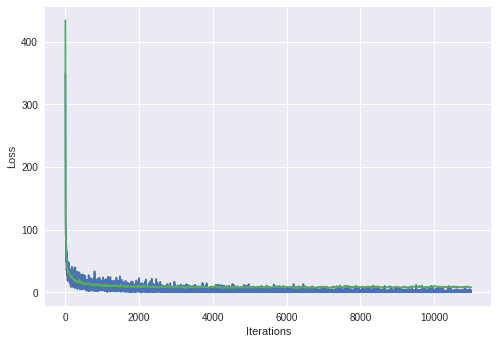

In [0]:
plt.plot(n_iterations,n_loss, label='Train Cost')
plt.plot(n_iterations,n_loss_test, label='Test Cost')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.show()

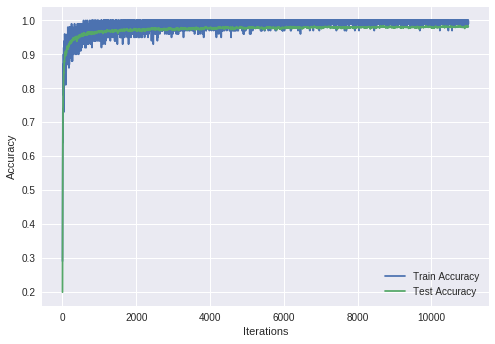

In [0]:
plt.plot(n_iterations,n_train_accuracy, label='Train Accuracy')
plt.plot(n_iterations,n_test_accuracy, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend()
plt.show()